In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 2
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 1.0
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[2_10_51_300_1.0_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[2_10_51_300_1.0_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0180

Best Fitness:	200.0059
Solution:	200.0000
Diff:		0.0059

[0:13:02][----------] 1.96% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0481

Best Fitness:	200.0133
Solution:	200.0000
Diff:		0.0133

[0:24:43][----------] 3.92% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0511

Best Fitness:	200.0120
Solution:	200.0000
Diff:		0.0120

[0:36:57][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.2032

Best Fitness:	200.0601
Solution:	200.0000
Diff:		0.0601

[0:47:21][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0150

Best Fitness:	200.0033
Solution:	200.0000
Diff:		0.0033

[0:58:16][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0173

Best Fitness:	200.0023
Solution:	200.0000
Diff:		0.0023

[1:09:12][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0151

Best Fitness:	200.0034
Solution:	200.0000
Diff:		0.0034

[1:20:09][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0466

Best Fitness:	200.0164
Solution:	200.0000
Diff:		0.0164

[1:30:59][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0205

Best Fitness:	200.0048
Solution:	200.0000
Diff:		0.0048

[1:41:06][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0868

Best Fitness:	200.0246
Solution:	200.0000
Diff:		0.0246

[1:51:25][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0301

Best Fitness:	200.0079
Solution:	200.0000
Diff:		0.0079

[2:01:43][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0229

Best Fitness:	200.0057
Solution:	200.0000
Diff:		0.0057

[2:11:54][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0112

Best Fitness:	200.0028
Solution:	200.0000
Diff:		0.0028

[2:22:03][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0121

Best Fitness:	200.0028
Solution:	200.0000
Diff:		0.0028

[2:32:02][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0316

Best Fitness:	200.0112
Solution:	200.0000
Diff:		0.0112

[2:40:47][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0463

Best Fitness:	200.0108
Solution:	200.0000
Diff:		0.0108

[2:49:42][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0527

Best Fitness:	200.0164
Solution:	200.0000
Diff:		0.0164

[2:58:28][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0536

Best Fitness:	200.0157
Solution:	200.0000
Diff:		0.0157

[3:07:07][####------] 35.29% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0167

Best Fitness:	200.0042
Solution:	200.0000
Diff:		0.0042

[3:15:49][####------] 37.25% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0290

Best Fitness:	200.0068
Solution:	200.0000
Diff:		0.0068

[3:24:02][####------] 39.22% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0298

Best Fitness:	200.0086
Solution:	200.0000
Diff:		0.0086

[3:32:23][####------] 41.18% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.1277

Best Fitness:	200.0247
Solution:	200.0000
Diff:		0.0247

[3:40:40][####------] 43.14% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0390

Best Fitness:	200.0075
Solution:	200.0000
Diff:		0.0075

[3:48:44][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0489

Best Fitness:	200.0079
Solution:	200.0000
Diff:		0.0079

[3:57:02][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0568

Best Fitness:	200.0133
Solution:	200.0000
Diff:		0.0133

[4:04:53][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0212

Best Fitness:	200.0042
Solution:	200.0000
Diff:		0.0042

[4:12:48][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0705

Best Fitness:	200.0114
Solution:	200.0000
Diff:		0.0114

[4:21:18][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0838

Best Fitness:	200.0245
Solution:	200.0000
Diff:		0.0245

[4:29:24][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0284

Best Fitness:	200.0070
Solution:	200.0000
Diff:		0.0070

[4:37:43][######----] 56.86% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0186

Best Fitness:	200.0056
Solution:	200.0000
Diff:		0.0056

[4:45:59][######----] 58.82% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0182

Best Fitness:	200.0051
Solution:	200.0000
Diff:		0.0051

[4:53:42][######----] 60.78% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0296

Best Fitness:	200.0059
Solution:	200.0000
Diff:		0.0059

[5:01:02][######----] 62.75% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0420

Best Fitness:	200.0115
Solution:	200.0000
Diff:		0.0115

[5:08:09][######----] 64.71% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0400

Best Fitness:	200.0050
Solution:	200.0000
Diff:		0.0050

[5:15:02][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0493

Best Fitness:	200.0151
Solution:	200.0000
Diff:		0.0151

[5:21:35][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0283

Best Fitness:	200.0074
Solution:	200.0000
Diff:		0.0074

[5:27:39][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0622

Best Fitness:	200.0206
Solution:	200.0000
Diff:		0.0206

[5:33:45][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0237

Best Fitness:	200.0053
Solution:	200.0000
Diff:		0.0053

[5:39:51][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0173

Best Fitness:	200.0028
Solution:	200.0000
Diff:		0.0028

[5:45:54][########--] 76.47% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0298

Best Fitness:	200.0037
Solution:	200.0000
Diff:		0.0037

[5:51:55][########--] 78.43% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0514

Best Fitness:	200.0098
Solution:	200.0000
Diff:		0.0098

[5:57:41][########--] 80.39% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0329

Best Fitness:	200.0070
Solution:	200.0000
Diff:		0.0070

[6:03:14][########--] 82.35% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0217

Best Fitness:	200.0049
Solution:	200.0000
Diff:		0.0049

[6:08:42][########--] 84.31% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0662

Best Fitness:	200.0111
Solution:	200.0000
Diff:		0.0111

[6:14:06][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0313

Best Fitness:	200.0113
Solution:	200.0000
Diff:		0.0113

[6:19:35][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0749

Best Fitness:	200.0086
Solution:	200.0000
Diff:		0.0086

[6:24:56][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0263

Best Fitness:	200.0060
Solution:	200.0000
Diff:		0.0060

[6:29:56][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0210

Best Fitness:	200.0054
Solution:	200.0000
Diff:		0.0054

[6:34:53][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0312

Best Fitness:	200.0036
Solution:	200.0000
Diff:		0.0036

[6:39:22][##########] 96.08% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0290

Best Fitness:	200.0040
Solution:	200.0000
Diff:		0.0040

[6:43:49][##########] 98.04% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	200.0119

Best Fitness:	200.0023
Solution:	200.0000
Diff:		0.0023

[6:48:30][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

6:48:30

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
326,0.013678,0.014028,0.018335,0.018551,0.016646,0.016663,0.007989,0.019742,0.013629,0.021583,...,0.008635,0.016882,0.019111,0.019031,0.016357,0.009223,0.026595,0.007918,0.009269,50
327,0.013678,0.014028,0.018335,0.009859,0.016646,0.016663,0.007989,0.019742,0.013629,0.016223,...,0.008635,0.012666,0.019111,0.019031,0.009799,0.009223,0.026595,0.007918,0.009269,50
328,0.013678,0.014028,0.011950,0.008922,0.016646,0.016663,0.007989,0.019742,0.013629,0.016223,...,0.008635,0.012666,0.019111,0.019031,0.009799,0.009223,0.013870,0.007918,0.009269,50
329,0.013678,0.014028,0.011795,0.008922,0.016646,0.016663,0.007989,0.006937,0.013629,0.016223,...,0.008635,0.012666,0.019111,0.019031,0.009799,0.009223,0.013870,0.007918,0.009269,50
330,0.013678,0.014028,0.011795,0.008922,0.016646,0.016663,0.007989,0.006937,0.013629,0.016223,...,0.008635,0.012666,0.015816,0.019031,0.008239,0.009223,0.013870,0.007918,0.009269,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.0058893417643446355

Best error for run 1: 0.013324098882094404

Best error for run 2: 0.012016638982146333

Best error for run 3: 0.060076060647048735

Best error for run 4: 0.003273078792886963

Best error for run 5: 0.0022690877221691608

Best error for run 6: 0.0034276180760457464

Best error for run 7: 0.016419999660229223

Best error for run 8: 0.004829594495049605

Best error for run 9: 0.02463005705095611

Best error for run 10: 0.0079250595185556

Best error for run 11: 0.00572995320143832

Best error for run 12: 0.0027934665727400443

Best error for run 13: 0.002802750237691498

Best error for run 14: 0.011167086267022341

Best error for run 15: 0.010799478576217325

Best error for run 16: 0.016449508350632414

Best error for run 17: 0.01566034896467272

Best error for run 18: 0.0042280477264284855

Best error for run 19: 0.006762486094146425

Best error for run 20: 0.008634768736555998

Best error for run 21: 0.024711692724224577

Best error for run 22: 0.0075029621534952184

Best error for run 23: 0.007929480704632397

Best error for run 24: 0.01328820927471952

Best error for run 25: 0.0042201674817192725

Best error for run 26: 0.011397495180631267

Best error for run 27: 0.024476418721064874

Best error for run 28: 0.007008483761865136

Best error for run 29: 0.005561310607561154

Best error for run 30: 0.00506054848773374

Best error for run 31: 0.005898248266362316

Best error for run 32: 0.011531534000710053

Best error for run 33: 0.005002970991768052

Best error for run 34: 0.015064328093444601

Best error for run 35: 0.007353718068799253

Best error for run 36: 0.02059922704921746

Best error for run 37: 0.0053096555247407196

Best error for run 38: 0.0028125821077082946

Best error for run 39: 0.003729534906057097

Best error for run 40: 0.00979895898476002

Best error for run 41: 0.006991813225312171

Best error for run 42: 0.004942202831841769

Best error for run 43: 0.011116541252221168

Best error for run 44: 0.011259941902324044

Best error for run 45: 0.008585902711388371

Best error for run 46: 0.006001891756483246

Best error for run 47: 0.005431282899991174

Best error for run 48: 0.0035941634662037814

Best error for run 49: 0.004028723802065315

Best error for run 50: 0.002336480072813174

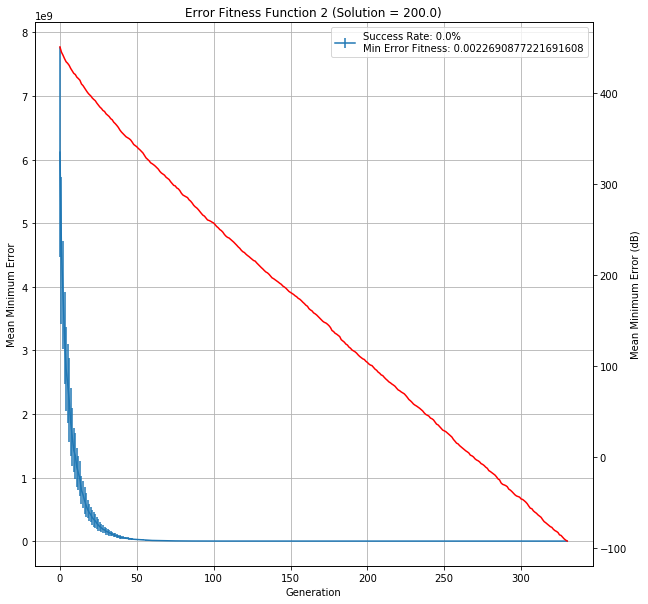

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[2_10_51_300_1.0_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,2,10,1.0,0.005889,0.013324,0.012017,0.060076,0.003273,0.002269,...,0.01126,0.008586,0.006002,0.005431,0.003594,0.004029,0.002336,0.009836,6:48:30,99900
